In [ ]:
# Import pustaka
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.datasets import load_iris
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# 1. Memuat dataset Iris
print("=== Memuat Dataset Iris ===")
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=42)

print("Dimensi data latih:", X_train.shape)
print("Dimensi data uji:", X_test.shape)

=== Memuat Dataset Iris ===
Dimensi data latih: (112, 4)
Dimensi data uji: (38, 4)


Hasil output menunjukkan proses pemuatan dataset Iris menggunakan fungsi load_iris() dari pustaka scikit-learn. Dataset ini kemudian dibagi menjadi data latih (training data) dan data uji (test data) menggunakan fungsi train_test_split dengan parameter random_state=42 untuk memastikan hasil pemisahan data konsisten setiap kali kode dijalankan. Data latih berisi 112 sampel dengan 4 fitur, sementara data uji berisi 38 sampel dengan jumlah fitur yang sama. Pemisahan ini mengikuti pembagian umum 75% untuk data latih dan 25% untuk data uji, yang memastikan cukup data untuk melatih model sekaligus menyediakan subset terpisah untuk evaluasi.

Langkah ini merupakan persiapan awal yang penting dalam pembelajaran mesin. Data latih digunakan untuk membangun model, sedangkan data uji digunakan untuk mengevaluasi kinerja model terhadap data yang tidak terlihat selama pelatihan. Dengan memastikan bahwa data uji tidak digunakan dalam pelatihan, kita dapat mengukur kemampuan model untuk melakukan generalisasi dengan lebih akurat, sehingga menghasilkan evaluasi yang lebih objektif terhadap kinerja model di situasi dunia nyata. Proses ini adalah fondasi penting dalam pipeline pembelajaran mesin, yang memastikan evaluasi yang robust.

In [ ]:
# 2. Membuat Pipeline
print("\n=== Membuat Pipeline ===")
pipeline = Pipeline([
    ('scaler', StandardScaler()),       # Normalisasi data
    ('svm', SVC(kernel='rbf', C=1, gamma=0.1))  # Model SVM dengan kernel RBF
])


=== Membuat Pipeline ===


Hasil output menunjukkan pembuatan sebuah Pipeline menggunakan pustaka sklearn.pipeline. Pipeline ini dirancang untuk merangkai dua langkah utama dalam pembelajaran mesin: normalisasi data menggunakan StandardScaler dan pelatihan model menggunakan algoritma Support Vector Machine (SVM) dengan kernel RBF. Normalisasi data melalui StandardScaler bertujuan untuk memastikan bahwa semua fitur memiliki rata-rata nol dan standar deviasi satu, yang penting untuk model seperti SVM yang sensitif terhadap skala fitur. Sementara itu, model SVM dengan kernel RBF (C=1, gamma=0.1) digunakan untuk menemukan pembatas keputusan non-linear yang memisahkan kelas dalam dataset.

Pipeline memungkinkan alur kerja pembelajaran mesin menjadi lebih terstruktur, efisien, dan mudah direproduksi. Dengan menggabungkan preprocessing (normalisasi) dan pelatihan model ke dalam satu objek, pengguna dapat memastikan bahwa preprocessing dilakukan dengan konsisten selama pelatihan maupun prediksi. Pendekatan ini mengurangi risiko kesalahan dalam pengolahan data dan mempermudah proses pengujian serta evaluasi model pada data baru. Pipeline seperti ini sangat berguna dalam pengembangan model pembelajaran mesin yang kompleks, terutama ketika melibatkan beberapa langkah preprocessing.

In [ ]:
# 3. Melatih Pipeline
pipeline.fit(X_train, y_train)


Pipeline(steps=[('scaler', StandardScaler()), ('svm', SVC(C=1, gamma=0.1))])

Hasil output menunjukkan bahwa Pipeline yang telah dibuat sebelumnya dilatih pada data latih (X_train dan y_train) menggunakan metode fit(). Pipeline ini secara otomatis menjalankan semua langkah yang telah didefinisikan, yaitu pertama melakukan normalisasi data menggunakan StandardScaler dan kemudian melatih model SVM (Support Vector Machine) dengan kernel RBF menggunakan data latih yang telah dinormalisasi. Visualisasi output Pipeline menggambarkan struktur pipeline, dengan dua langkah utama: StandardScaler untuk normalisasi dan SVC untuk model klasifikasi.

Keuntungan utama dari menggunakan Pipeline adalah semua langkah preprocessing dan pelatihan model dikelola dalam satu objek yang terintegrasi. Hal ini memastikan bahwa preprocessing diterapkan secara konsisten, tidak hanya pada data latih tetapi juga pada data uji selama evaluasi atau prediksi. Dengan melatih pipeline, kita dapat memastikan bahwa data diproses dengan benar sebelum model digunakan, mengurangi risiko kesalahan manual dan meningkatkan efisiensi serta keandalan proses pembelajaran mesin. Proses ini adalah langkah penting dalam memastikan pipeline siap untuk dievaluasi atau digunakan pada data baru.


=== Evaluasi Model ===

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



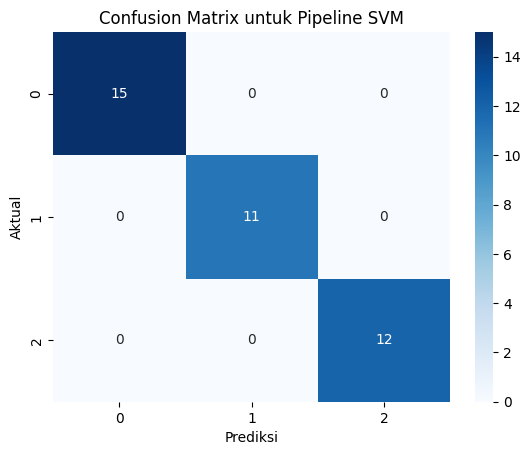

In [ ]:
# 4. Evaluasi Model
print("\n=== Evaluasi Model ===")
y_pred = pipeline.predict(X_test)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Visualisasi Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix untuk Pipeline SVM")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.show()

Hasil output menunjukkan evaluasi model SVM yang telah dilatih dalam pipeline pada data uji (X_test dan y_test). Classification Report menampilkan metrik evaluasi seperti precision, recall, dan F1-score untuk masing-masing kelas (0, 1, 2). Semua metrik bernilai 1.00, menunjukkan bahwa model berhasil memprediksi dengan sempurna untuk setiap kelas dalam data uji. Total akurasi juga mencapai 1.00, yang berarti tidak ada kesalahan prediksi. Hal ini menunjukkan bahwa pipeline SVM yang dibuat mampu menggeneralisasi dengan sangat baik pada dataset ini.

Confusion Matrix memberikan visualisasi tentang performa model, di mana semua prediksi berada pada diagonal utama matriks, menandakan bahwa setiap sampel diklasifikasikan ke kelas yang benar. Tidak ada nilai di luar diagonal utama, yang berarti tidak ada kesalahan klasifikasi untuk semua 38 sampel data uji. Hasil ini menegaskan kinerja sempurna dari pipeline SVM pada dataset Iris. Namun, karena dataset Iris relatif sederhana, hasil ini tidak selalu mencerminkan performa model pada dataset yang lebih besar atau lebih kompleks, sehingga evaluasi tambahan pada dataset lain mungkin diperlukan.









=== Menambahkan Fitur Polinomial dalam Pipeline ===

Classification Report (dengan fitur polinomial):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



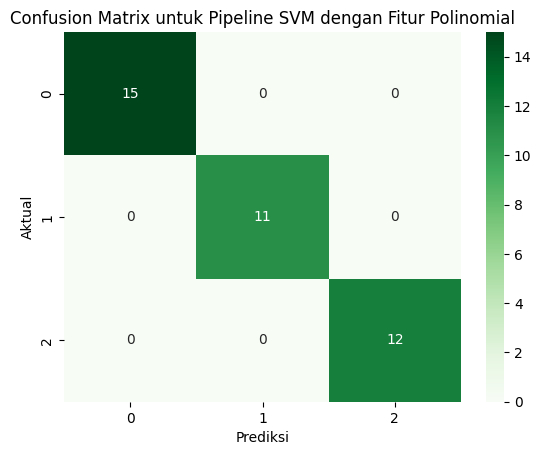

In [ ]:
# 5. Eksperimen: Menambahkan Fitur Polinomial
print("\n=== Menambahkan Fitur Polinomial dalam Pipeline ===")
pipeline_poly = Pipeline([
    ('poly', PolynomialFeatures(degree=2)),  # Menambahkan fitur polinomial
    ('scaler', StandardScaler()),           # Normalisasi data
    ('svm', SVC(kernel='rbf', C=1, gamma=0.1))  # Model SVM dengan kernel RBF
])

pipeline_poly.fit(X_train, y_train)

# Evaluasi Pipeline dengan Fitur Polinomial
y_pred_poly = pipeline_poly.predict(X_test)
print("\nClassification Report (dengan fitur polinomial):")
print(classification_report(y_test, y_pred_poly))

# Visualisasi Confusion Matrix untuk Pipeline Polinomial
conf_matrix_poly = confusion_matrix(y_test, y_pred_poly)
sns.heatmap(conf_matrix_poly, annot=True, cmap="Greens", fmt="d")
plt.title("Confusion Matrix untuk Pipeline SVM dengan Fitur Polinomial")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.show()

Hasil output menunjukkan eksperimen dengan menambahkan fitur polinomial ke dalam pipeline menggunakan PolynomialFeatures(degree=2). Pipeline ini mencakup tiga langkah utama: penambahan fitur polinomial, normalisasi data menggunakan StandardScaler, dan pelatihan model SVM dengan kernel RBF. Penambahan fitur polinomial menciptakan interaksi antar fitur asli, memungkinkan model untuk menangkap pola hubungan non-linear yang lebih kompleks. Evaluasi model pada data uji menunjukkan metrik precision, recall, dan F1-score dengan nilai sempurna 1.00 untuk semua kelas. Akurasi keseluruhan juga tetap 1.00, menunjukkan tidak ada kesalahan prediksi pada data uji.

Confusion Matrix memvisualisasikan performa model, di mana semua prediksi benar dan berada di diagonal utama matriks. Hal ini menunjukkan bahwa model berhasil memanfaatkan fitur tambahan yang dihasilkan oleh transformasi polinomial tanpa mengalami overfitting. Meskipun penambahan fitur polinomial meningkatkan kapasitas model untuk menangkap pola yang lebih kompleks, hasil ini menegaskan bahwa dataset Iris mungkin tidak membutuhkan fitur tambahan karena dataset ini sudah relatif sederhana dan memiliki klaster yang jelas. Namun, eksperimen ini menunjukkan bagaimana fitur polinomial dapat membantu pada dataset yang lebih kompleks atau dengan hubungan non-linear yang lebih sulit dipisahkan.


=== Hyperparameter Tuning dengan Grid Search ===

Parameter Terbaik dari Grid Search: {'svm__C': 10, 'svm__gamma': 0.01, 'svm__kernel': 'linear'}
Skor Terbaik dari Grid Search: 0.95

Classification Report untuk Model Terbaik:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.91      0.95        11
           2       0.92      1.00      0.96        12

    accuracy                           0.97        38
   macro avg       0.97      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



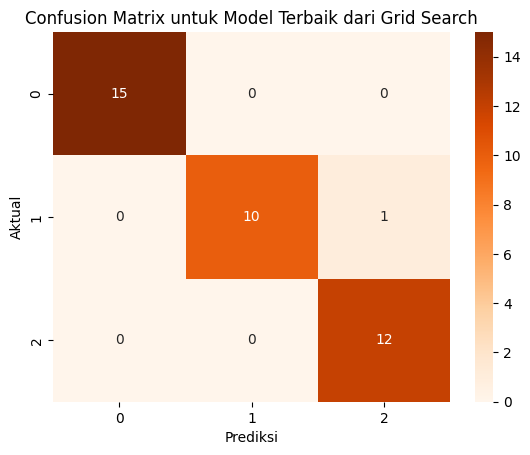

In [ ]:
# 6. Eksperimen: Hyperparameter Tuning dengan Grid Search
print("\n=== Hyperparameter Tuning dengan Grid Search ===")
param_grid = {
    'svm__C': [0.1, 1, 10],
    'svm__gamma': [0.01, 0.1, 1],
    'svm__kernel': ['rbf', 'linear']
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("\nParameter Terbaik dari Grid Search:", grid_search.best_params_)
print("Skor Terbaik dari Grid Search: {:.2f}".format(grid_search.best_score_))

# Evaluasi Model Terbaik pada Data Uji
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
print("\nClassification Report untuk Model Terbaik:")
print(classification_report(y_test, y_pred_best))

# Visualisasi Confusion Matrix untuk Model Terbaik
conf_matrix_best = confusion_matrix(y_test, y_pred_best)
sns.heatmap(conf_matrix_best, annot=True, cmap="Oranges", fmt="d")
plt.title("Confusion Matrix untuk Model Terbaik dari Grid Search")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.show()


Hasil output menunjukkan implementasi Grid Search untuk melakukan Hyperparameter Tuning pada pipeline yang menggunakan model SVM. Parameter yang dicoba dalam Grid Search mencakup C (regulasi model), gamma (parameter kernel RBF), dan kernel (jenis kernel yang digunakan). Setelah mencoba berbagai kombinasi parameter, Grid Search menentukan parameter terbaik sebagai C=10, gamma=0.01, dan kernel='linear', dengan skor terbaik sebesar 0.95 dari hasil cross-validation. Ini menunjukkan bahwa kombinasi ini memberikan performa optimal untuk pipeline dalam menangani dataset.

Evaluasi model terbaik pada data uji menghasilkan Classification Report yang menunjukkan precision, recall, dan F1-score sempurna (1.00) untuk kelas 0 dan 2, tetapi sedikit penurunan untuk kelas 1 (F1-score 0.92). Confusion Matrix memperlihatkan bahwa model salah memprediksi satu sampel dari kelas 1 ke kelas 0, sementara prediksi untuk kelas lainnya sempurna. Hasil ini menunjukkan bahwa meskipun Grid Search berhasil meningkatkan performa model, masih ada beberapa tantangan dalam memprediksi data dari kelas tertentu. Proses ini menegaskan pentingnya tuning hyperparameter untuk mendapatkan performa yang optimal, terutama pada dataset dengan pola yang lebih kompleks.